In [1]:
import numpy as np 
import pandas as pd  

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print(os.listdir('.'))

['.anaconda', '.arduinoIDE', '.conda', '.condarc', '.continuum', '.gitconfig', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.popsql.json', '.virtual_documents', 'anaconda3', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Creative Cloud Files Personal Account sharmavivekmsd7@gmail.com 0A375BA45DC117070A495E5B@AdobeID', 'customer_churn.csv', 'Desktop', 'Digit Recognition Project Jupyter.ipynb', 'Digit Recognition with CNN Project.ipynb', 'Documents', 'Downloads', 'Favorites', 'featureprice.csv', 'homeprice1.csv', 'Links', 'Local Settings', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TM.blf', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{a2332f18-cdbf-11ec-8680-002248483d79}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'OneDrive - iitkgp.ac.in', 'pip', 'PrintHood'

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_df.shape

(42000, 785)

In [6]:
train_df.label.value_counts()


label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [8]:
digits = train_df.drop(['label'], axis=1).values
digits = digits / 255.
label = train_df['label'].values

digits.max(), label.max()

(1.0, 9)

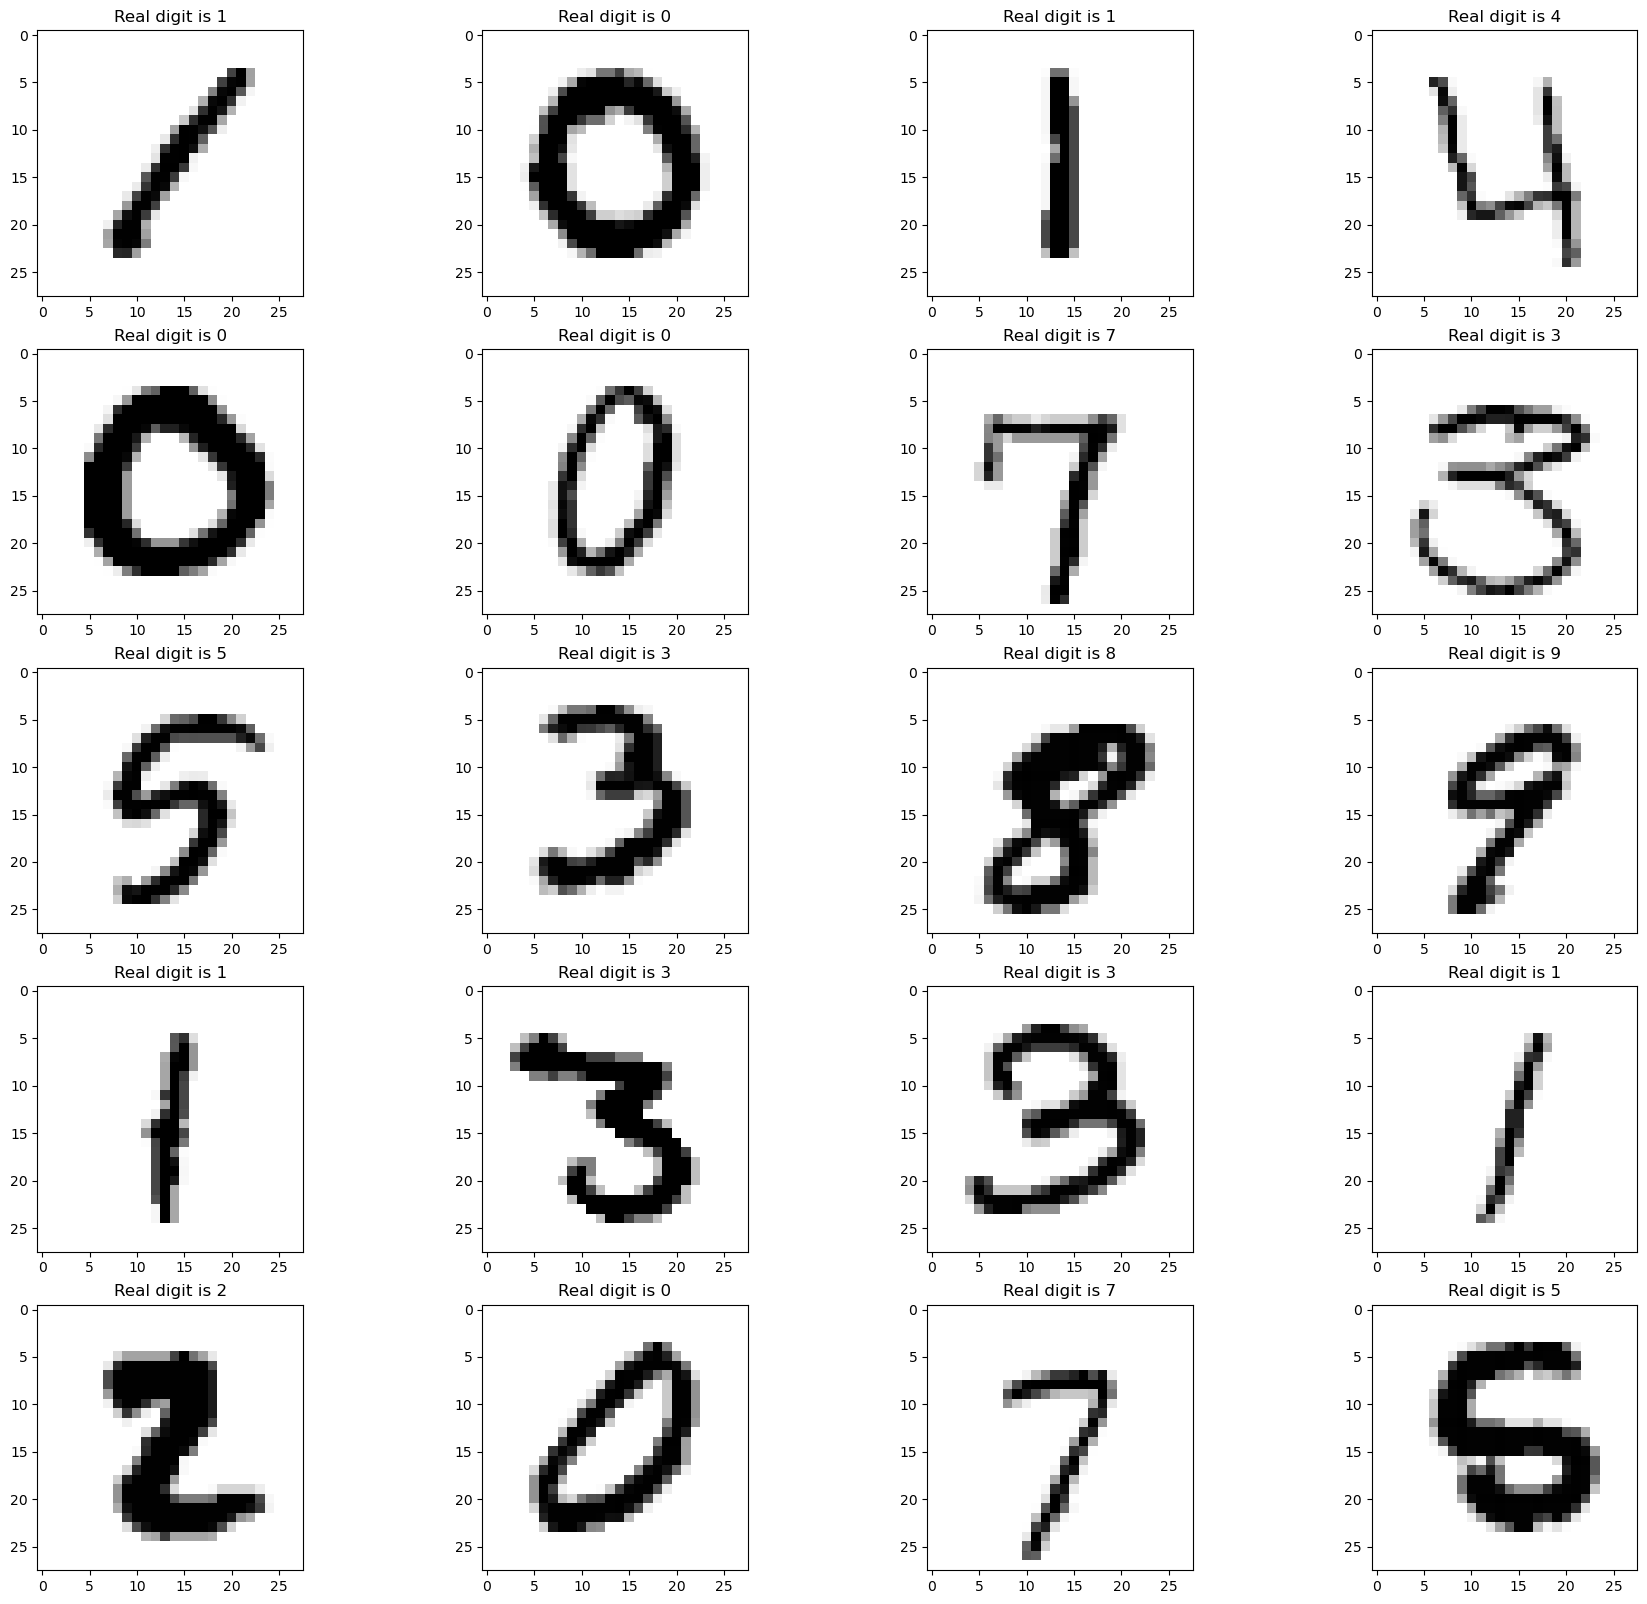

In [9]:
fig, axis = plt.subplots(5, 4, figsize=(22, 20))

for i, ax in enumerate(axis.flat):
    ax.imshow(digits[i].reshape(28, 28), cmap='binary')
    ax.set(title = "Real digit is {}".format(label[i]))

In [12]:
from sklearn.model_selection import train_test_split
 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

In [13]:
X = digits
y = label
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [14]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [15]:
y_pred = model.predict(X_test)  
rf_acc = accuracy_score(y_test, y_pred)

print("Model accuracy is: {0:.3f}%".format(rf_acc * 100))

Model accuracy is: 94.238%


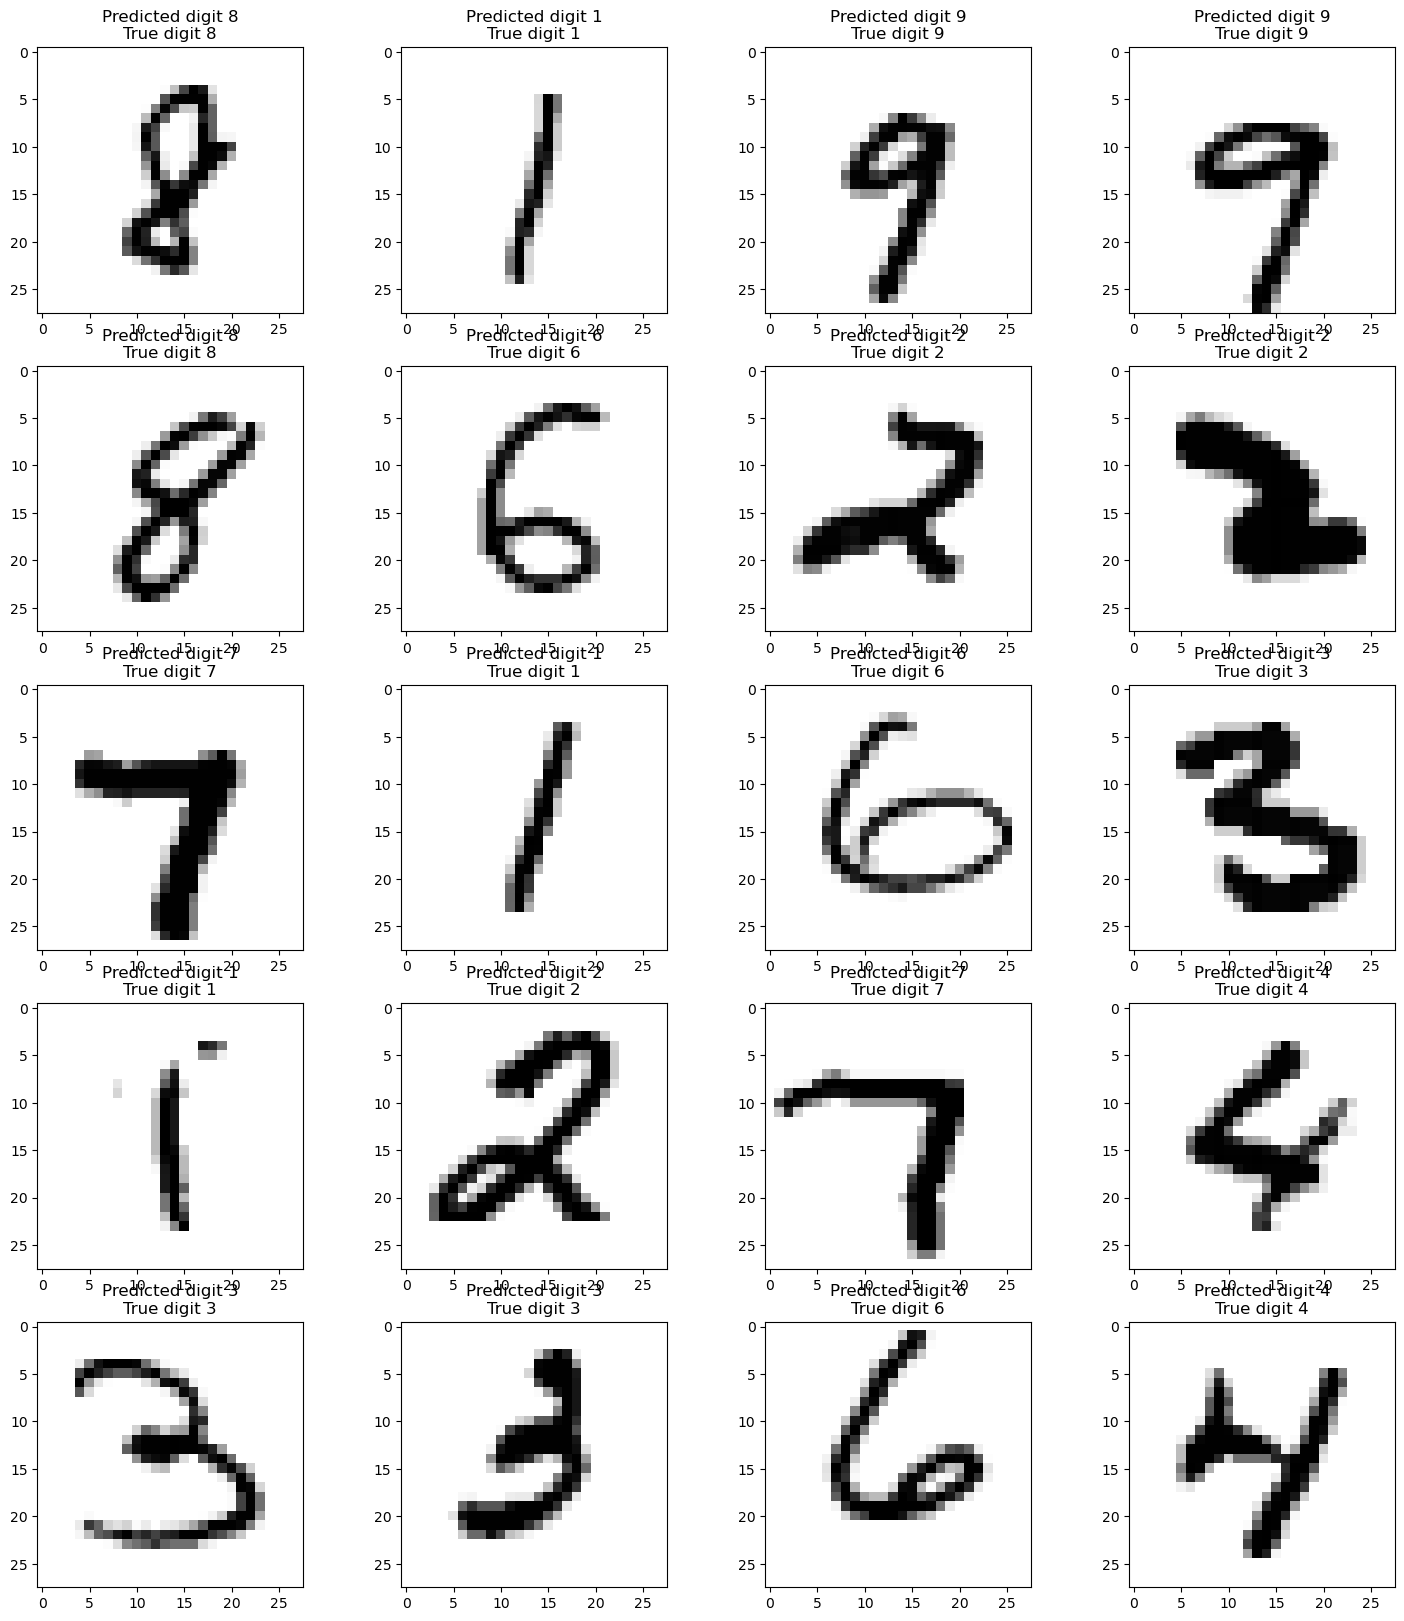

In [16]:
fig, axis = plt.subplots(5, 4, figsize=(18, 20))

for i, ax in enumerate(axis.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='binary')
    ax.set(title = "Predicted digit {0}\nTrue digit {1}".format(y_pred[i], y_test[i]))

In [17]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([408, 471, 420, 506, 397, 339, 402, 438, 403, 416], dtype=int64))

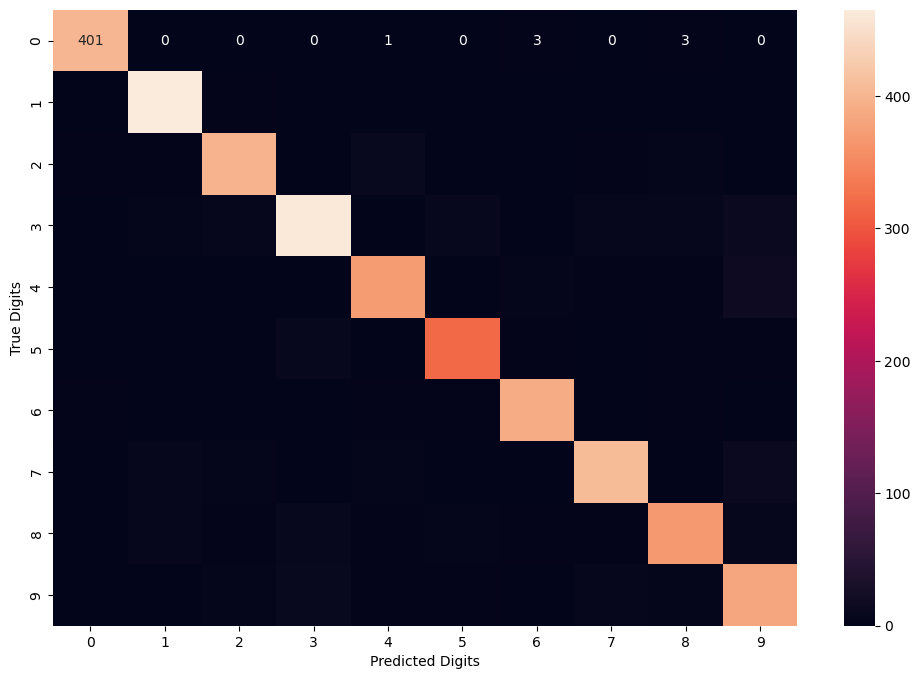

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

In [40]:
gnb = MultinomialNB(alpha=1e-3)
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)  
gnb_acc = accuracy_score(y_test, y_pred)

print("NB accuracy is: {0:.3f}%".format(gnb_acc * 100))

NB accuracy is: 82.762%


In [41]:
test_X = test_df.values / 255.
rfc_pred = model.predict(test_X)
gnb_pred = gnb.predict(test_X)

In [42]:
sub = pd.read_csv('sample_submission.csv')
sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [43]:
sub['Label'] = rfc_pred
sub.to_csv('submission.csv', index=False)

In [44]:
sub['Label'] = gnb_pred
sub.to_csv('GNB_submission.csv', index=False)

In [45]:
sub.head(10)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,2
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
